# MLDM Assignment 03

TODO: Write group name, group members, and their matriculation numbers

Team Name: KERNIGHAN
1. M. Rashedul Hasnat = 220202415
2. Saborni Shernaj Binte Elahi = 220202426
3. Resmin Hossain = 220200547
4. Basitur Rahman Chowdhury = 218100976

#1 Principal Component Analysis (Total of 100 Points)

Download assignment03.ipynb and use it as template for your solution. In the template,
you are given a small dataset with two features, resulting in 2D data that is stored
in mat. The data is then standardized, using the z-score scaling, and stored in z_mat.
In preparation of the the PCA technique, the covariance matrix is computed and the
eigendecomposition is performed on the covariance matrix.

In the following, read the tasks and implement their solution in the corresponding cells
of the template.

In [216]:
import numpy as np
import matplotlib.pyplot as plt

In [217]:
# Feature values
x1 = np.array([1.1,2.2,2.5,4,5.2,6.1]) # first feature
x2 = np.array([1.4,2.1,2.9,5,5.1,6.7]) # second feature
assert len(x1) == len(x2)

In [218]:
# Combine features to data matrix
mat = np.array([x1, x2]).transpose()
print(mat)

[[1.1 1.4]
 [2.2 2.1]
 [2.5 2.9]
 [4.  5. ]
 [5.2 5.1]
 [6.1 6.7]]


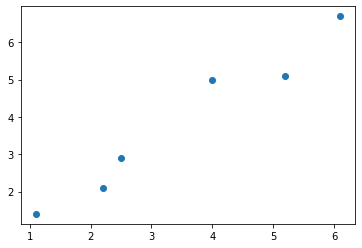

In [219]:
# Plot the data
plt.scatter(mat[:,0], mat[:,1])
plt.show()

In [220]:
# Standardize the features
mean1 = np.mean(mat[:,0])
std1 = np.std(mat[:,0])
mean2 = np.mean(mat[:,1])
std2 = np.std(mat[:,1])
z_mat = np.zeros(mat.shape)
z_mat[:,0] = (mat[:,0] - mean1) / std1
z_mat[:,1] = (mat[:,1] - mean2) / std2
print(z_mat)

[[-1.38195552 -1.31932673]
 [-0.75292749 -0.9449232 ]
 [-0.58137439 -0.51703345]
 [ 0.2763911   0.60617714]
 [ 0.9626035   0.65966336]
 [ 1.4772628   1.51544286]]


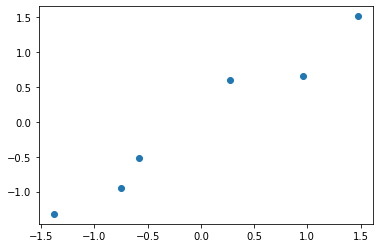

In [221]:
# Plot the standardized data
plt.scatter(z_mat[:,0], z_mat[:,1])
plt.show()

In [222]:
# Compute the covariance matrix
covariance_mat = np.cov(z_mat.transpose())
print(covariance_mat)

[[1.2        1.17530862]
 [1.17530862 1.2       ]]


In [223]:
# Compute the eigendecomposition
eigen_values, eigen_vectors = np.linalg.eig(covariance_mat)
print("Eigenvectors: \n", eigen_vectors,"\n")
print("Eigenvalues: \n", eigen_values, "\n")

Eigenvectors: 
 [[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]] 

Eigenvalues: 
 [2.37530862 0.02469138] 



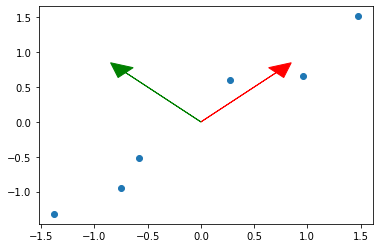

In [224]:
# Plot of standarized data and eigenvectors
plt.scatter(z_mat[:,0], z_mat[:,1])
plt.arrow(0, 0, eigen_vectors[0,0], eigen_vectors[1,0], color='r',
          head_width=0.2, head_length=0.2)
plt.arrow(0, 0, eigen_vectors[0,1], eigen_vectors[1,1], color='g',
          head_width=0.2, head_length=0.2)
plt.show()

## Task 1.1: Application of PCA (30 points)

1.1 Application of PCA (30 Points)

Consider the computed eigenvectors (eigen_vectors) and eigenvalues (eigen_values)
to transform the standardized data in z_mat from its 2D space into the 1D space by
applying the PCA technique. Choose the eigenvector with the highest corresponding
eigenvalue as principal component. Plot the transformed data into a scatter plot.

In [225]:
# TODO. See assignment sheet for instructions.
import matplotlib.pyplot as plt
%matplotlib inline

In [226]:
# TODO. See assignment sheet for instructions.

#sorting the eigenvalues in descending order
sorted_index = np.argsort(eigen_values)
sorted_eigenvalue = eigen_values[sorted_index]

#similarly sorting the eigenvectors 
sorted_eigenvectors = eigen_vectors[:,sorted_index]

# selecting the first n eigenvectors, n is desired dimension of our final reduced data.
n_components = 1 #as 1D
eigenvector_subset = eigen_vectors[:,0:n_components]

#Transforming the data 
mat_reduced = np.dot(eigenvector_subset.transpose(),z_mat.transpose()).transpose() 
print(mat_reduced)

[[-1.910095  ]
 [-1.20056174]
 [-0.77669163]
 [ 0.62406999]
 [ 1.1471159 ]
 [ 2.11616247]]


No handles with labels found to put in legend.


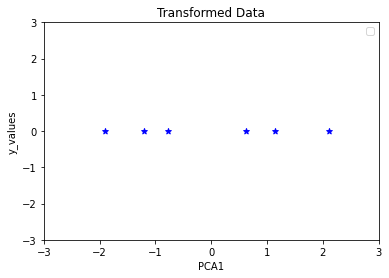

In [227]:
yy = [0,0,0,0,0,0]

# plotting the 1D data by setting the values of the second dimension (y) to zero.
plt.scatter(mat_reduced,yy,color='blue',marker='*')
plt.xlim([-3,3])
plt.ylim([-3,3])

#Chose the eigenvector with the highest corresponding eigenvalue as principal component. 
plt.xlabel('PCA1')
plt.ylabel('y_values')
plt.legend()
plt.title('Transformed Data')
plt.show()

## Task 1.2: Reconstruction of data (30 points)

1.2 Reconstruction of data (30 Points)

Reconstruct the data from the 1D space by projecting it back into the 2D space of the
original data (mat). Mind the scaling!

In [228]:
# TODO. See assignment sheet for instructions.

#sorting the eigenvalues in descending order
sorted_index = np.argsort(eigen_values)
sorted_eigenvalue = eigen_values[sorted_index]
#similarly sorting the eigenvectors 
sorted_eigenvectors = eigen_vectors[:,sorted_index]

# selecting the first n eigenvectors, n is desired dimension of our final reduced data.
n_components = 2 
eigenvector_subset = sorted_eigenvectors[:,0:n_components]

#Transforming the data (PCA Technique)
mat_reduced_tw_dm = np.dot(eigenvector_subset.transpose(),z_mat.transpose()).transpose() 
print(mat_reduced_tw_dm)

[[ 0.04428525 -1.910095  ]
 [-0.13576146 -1.20056174]
 [ 0.04549592 -0.77669163]
 [ 0.23319395  0.62406999]
 [-0.21421103  1.1471159 ]
 [ 0.02699738  2.11616247]]


In [229]:
#transpose of eigen_vectors to match dimension in main calculation
sa = np.transpose(eigen_vectors)
#Reconstruction of z_mat data
recovered_z_mat = mat_reduced_tw_dm.dot(np.transpose(sa))
print(recovered_z_mat)

[[-1.31932673 -1.38195552]
 [-0.9449232  -0.75292749]
 [-0.51703345 -0.58137439]
 [ 0.60617714  0.2763911 ]
 [ 0.65966336  0.9626035 ]
 [ 1.51544286  1.4772628 ]]


In [232]:
#z_mat show
z_mat

array([[-1.38195552, -1.31932673],
       [-0.75292749, -0.9449232 ],
       [-0.58137439, -0.51703345],
       [ 0.2763911 ,  0.60617714],
       [ 0.9626035 ,  0.65966336],
       [ 1.4772628 ,  1.51544286]])

In [237]:
#denoting original_mat matrix as per shape
original_mat = np.zeros(mat.shape)
# scaling the features (mat)
original_mat[:,0] = ((recovered_z_mat[:,0] * std1) + mean1) #for column 0
original_mat[:,1] = ((recovered_z_mat[:,1] * std2) + mean2) #for column 1
print(original_mat.round(decimals=1, out=None))

[[1.2 1.3]
 [1.9 2.5]
 [2.6 2.8]
 [4.6 4.4]
 [4.7 5.7]
 [6.2 6.6]]


In [238]:
#mat show
mat

array([[1.1, 1.4],
       [2.2, 2.1],
       [2.5, 2.9],
       [4. , 5. ],
       [5.2, 5.1],
       [6.1, 6.7]])

## Task 1.3: Plotting of data (20 points)

1.3 Plotting of data (20 Points)

Plot the original data mat and the reconstructed data into the same scatter plot. Mark
the two sets of data with a different color or symbol.

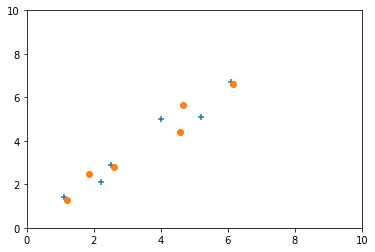

In [239]:
# TODO. See assignment sheet for instructions.
# Plot the original data mat and the reconstructed data into the same scatter plot. 
#Mark the two sets of data with a different color or symbol.

#plotting of mat
plt.scatter(mat[:,0], mat[:,1],marker = '+')

#plotting of original_mat,after reconstruction and scalling
plt.scatter(original_mat[:,0], original_mat[:,1],marker = 'o')

#to define range
plt.xlim([0,10])
plt.ylim([0,10])

plt.show()

## Task 1.4: Error of PCA (20 points)

1.4 Error of PCA (20 Points)

Compute the error that has been introduced by the PCA technique in the data through
summing the pairwise distance between data points from the original data and their
reconstructed selfs from the previous subtask.

In [250]:
#1.4 
import numpy as np
from numpy import linalg as LA
#to calculate error from the original data and their reconstructed selfs
total_loss=(mat-original_mat)
print(total_loss)

#to return matrix norm
loss=LA.norm((mat-original_mat),None)
print(loss)

#converting matrix -> array
A = mat.tolist()
B = original_mat.tolist()
#summing the pairwise distance between data points from the original data and their reconstructed selfs 
#from the previous subtask.
#Function for RMSE calculation 
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

#RMSE calculation func call
rmse_value = rmse(np.array(A), np.array(B))
print("Error is: " + str(rmse_value))

[[-0.10952084  0.11709334]
 [ 0.33574859 -0.35896294]
 [-0.11251492  0.12029444]
 [-0.57670664  0.61658133]
 [ 0.52976042 -0.56638915]
 [-0.06676661  0.07138299]]
1.27207574623339
Error is: 0.3672166372587209
